In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

in_dir = 'drive/MyDrive/Datos - Hackathon JusticIA/'
in_file = 'JusticIA_DatosTranscripciones.csv'

df = pd.read_csv(in_dir+in_file)
df.tail()

Fuente     Conjunto  ... Texto MetodoTexto
2954  Expedientes AGN  Expedientes  ...   NaN         NaN
2955  Expedientes AGN  Expedientes  ...   NaN         NaN
2956  Expedientes AGN  Expedientes  ...   NaN         NaN
2957  Expedientes AGN  Expedientes  ...   NaN         NaN
2958  Expedientes AGN  Expedientes  ...   NaN         NaN

[5 rows x 5 columns]

In [ ]:
import PIL

from glob import glob
from random import sample

def get_width_and_height(file_name):
    image = PIL.Image.open(file_name)
    return image.size
    
files = glob(in_dir+'/*/*.*')
files_sample = sample(files, 40)

for file_name in files_sample:
    width, height = get_width_and_height(file_name)
    print(width, height, file_name)

4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_VARP_VARP_6_IMG_5756.JPG
2304 1728 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_Detenidos_Desaparecidos_Gamiz_Garcia_Jacobo_Gamiz_Garcia_Jacobo-79-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Policia_de_Guerrero_IMG_0301.JPG
1920 1080 drive/MyDrive/Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-009.jpg
3264 2448 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_PDLP_militantes_Arreola_Castillo_Narciso_Arreola_Castillo_Narciso-1-.JPG
1920 1080 drive/MyDrive/Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-157.jpg
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_Detenidos_Desaparecidos_Cabanas_Ocampo_Luis_11._61-10-19._Cabanas_Ocampo_Jose_Luis.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_Represores_Figueroa_Figueroa_Ruben_Figuero

In [ ]:
from google.colab import files
df_long = df[df['Texto'].str.len()>2000]

for dir, fil in zip(df_long['Conjunto'].values, df_long['NombreArchivo'].values):
    file_name = in_dir + dir + '/' + fil
    width, height = get_width_and_height(file_name)
    print(width, height, file_name)
    # I downloaded some images to check the results
    # files.download(file_name)


3456 4608 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_UPCEG,_Version_Publica-59-04-09_a_85-12-04-,_Guerrero_UPCEG,_2_de_4-67-04-21_a_69-09-18-_2_de_4-67-04-21_a_69-09-18-33-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Corral_Garcia_Salvador,_Version_Publica_Corral_Garcia_Salvador,_Version_Publica-147-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Detenidos_Desaparecidos_Arenas_Bautista_Marcelo_74-08-09,_ARENAS_BAUTISTA,_Marcelo-10-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Esparza_Flores_Jose_Luis_Esparza_Flores_Jose_Luis-23-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Esparza_Flores_Jose_Luis_Esparza_Flores_Jose_Luis-26-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Frente_Armado_del_Pueblo_Fichas_Frente_Armado_del_Pueblo,_fichas-66-.JPG
4608 3456 drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_G

In [ ]:
files

<module 'google.colab.files' from '/usr/local/lib/python3.7/dist-packages/google/colab/files.py'>

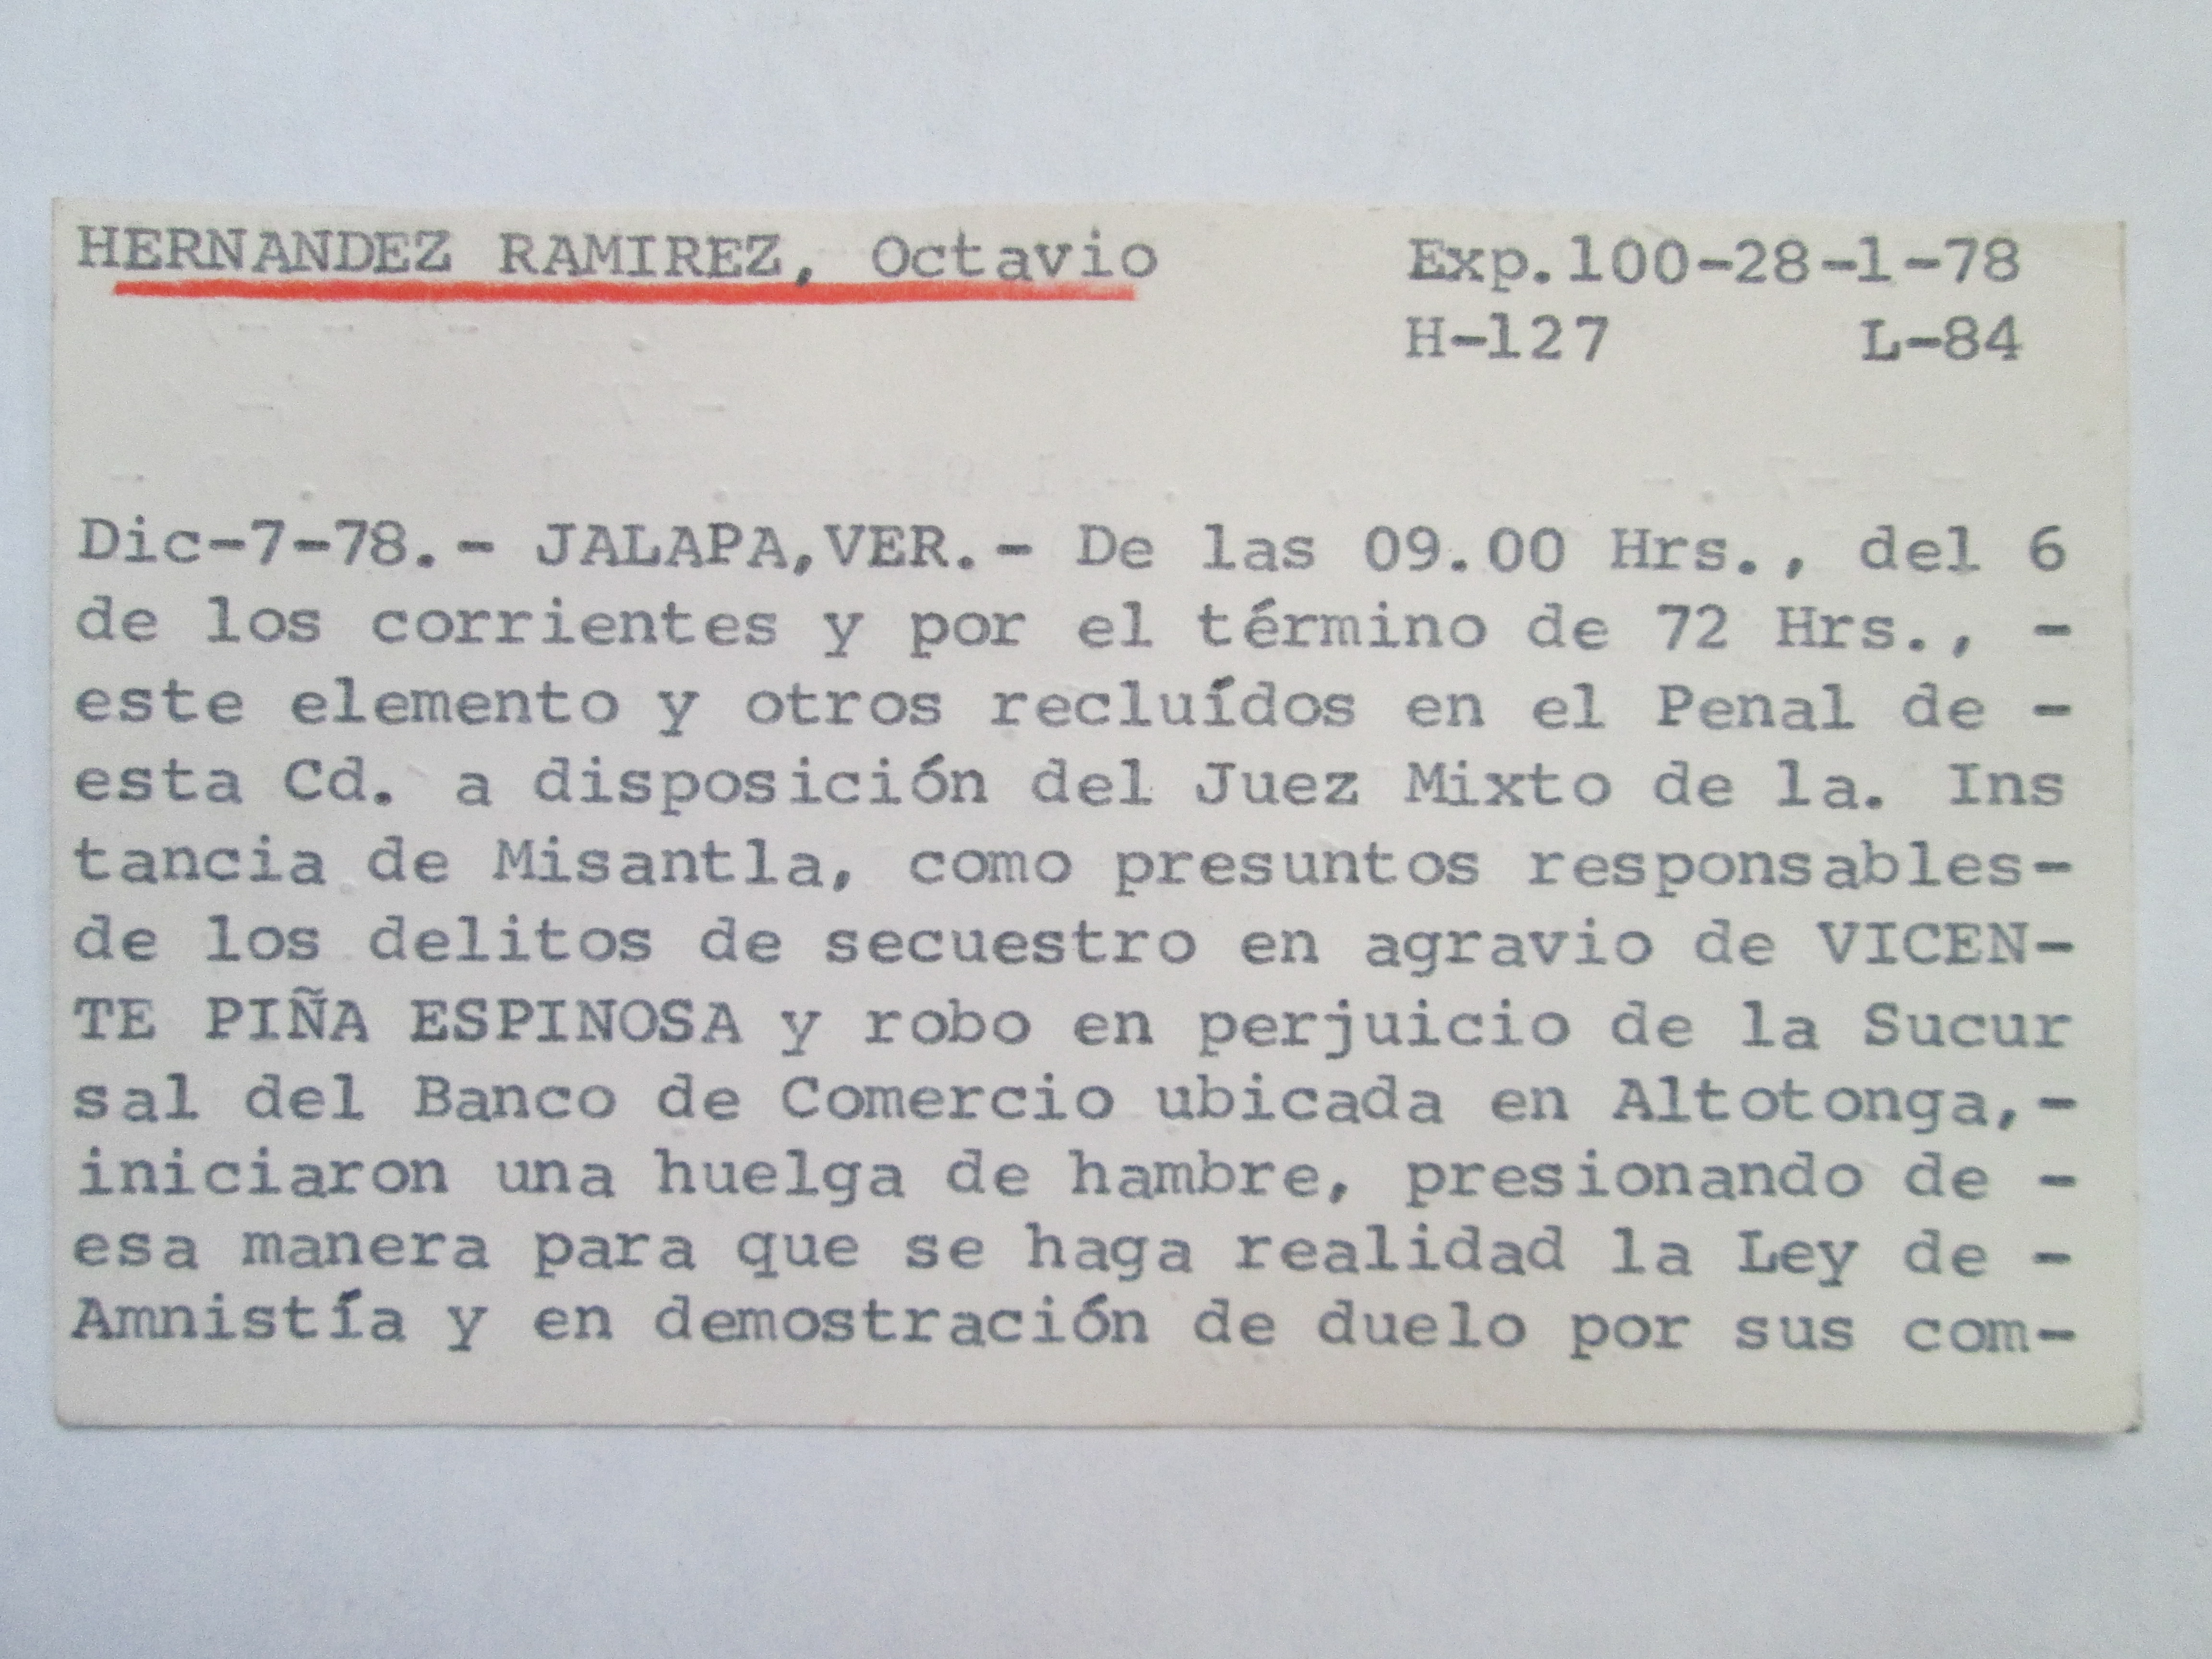

In [ ]:
from IPython.display import Image, display
display(Image(files_sample[0]))

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt install tesseract-ocr-spa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-spa is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
import csv
import os

In [ ]:
def save_findings(extractedText, originalFilename):
    
  # field names 
  fields = ['original_file_name', 'text_file_name', 'clasificador'] 

  file_name = os.path.basename(originalFilename)
  temp_file_name = os.path.splitext(file_name)[0] + '.txt'
  # print(file_name, temp_file_name)
  textFile = "data/" + temp_file_name
  # print(file_name.replace('_', ' '))
  row = [originalFilename, textFile, file_name.replace('_', ' ')]
          
  # name of csv file 
  filename = "results.csv"
      
  # writing to csv file 
  with open(filename, 'a+') as csvfile: 
      # creating a csv writer object 
      csvwriter = csv.writer(csvfile) 
          
      # writing the fields 
      csvwriter.writerow(fields) 
          
      # writing the data rows 
      csvwriter.writerow(row)


  with open(textFile, 'w+') as f:
      f.write(extractedText)

In [ ]:
# Example:
# save_findings("hello", "1.jpeg")
# files.download("drive/MyDrive/Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-139.jpg")
# img = Image.open("drive/MyDrive/Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-139.jpg")

In [ ]:
# img.format

In [ ]:
SUPPORTED_FORMATS = {
    'JPEG',
    'PNG',
    'PBM',
    'PGM',
    'PPM',
    'TIFF',
    'BMP',
    'GIF',
    'WEBP',
}

for el in files_sample: 
  print("Analizando ..." + el)
  currentImage = Image.open(el)
  if currentImage.format not in SUPPORTED_FORMATS:
    currentImage = currentImage.convert('RGB')
  extractedInformation = pytesseract.image_to_string(currentImage, lang='spa')
  save_findings(extractedInformation, el)

Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_VARP_VARP_6_IMG_5756.JPG
Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_Detenidos_Desaparecidos_Gamiz_Garcia_Jacobo_Gamiz_Garcia_Jacobo-79-.JPG
Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Fichas_auto/Ficheros_Policia_de_Guerrero_IMG_0301.JPG
Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-009.jpg
Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_PDLP_militantes_Arreola_Castillo_Narciso_Arreola_Castillo_Narciso-1-.JPG
Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-157.jpg
Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_Detenidos_Desaparecidos_Cabanas_Ocampo_Luis_11._61-10-19._Cabanas_Ocampo_Jose_Luis.JPG
Analizando ...drive/MyDrive/Datos - Hackathon JusticIA/Fichas_manual/Ficheros_Represores

In [ ]:
!zip -r /content/data.zip /content/data

updating: content/data/ (stored 0%)
updating: content/data/Ficheros_Genaro_Vazquez_Rojas_60-01-26_a_66-07-04_DSC02314.txt (deflated 26%)
updating: content/data/Ficheros_Represores_Arriaga_Valero_Manuel,_Judicial_Sinaloa_Arriaga_Valero_Manuel-3-,_Coordinador_Judicial_Sinaloa.txt (deflated 23%)
updating: content/data/.ipynb_checkpoints/ (stored 0%)
updating: content/data/Ficheros_Detenidos_Desaparecidos_Gamiz_Garcia_Jacobo_Gamiz_Garcia_Jacobo-79-.txt (deflated 29%)
updating: content/data/Ficheros_Represores_Figueroa_Figueroa_Ruben_Figueroa_Figueroa_Ruben_1_Figueroa_Figueroa_Ruben-302-.txt (deflated 25%)
updating: content/data/Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-122-.txt (deflated 32%)
updating: content/data/Ficheros_Represores_Figueroa_Figueroa_Ruben_Figueroa_Figueroa_Ruben_2_De_79-07-20_a_83-06-04,_FIGUEROA_FIGUEROA,_Ruben-72-.txt (deflated 35%)
updating: content/data/Ficheros_VARP_VARP_3_IMG_5622.txt (deflated 29%)
updating: content/data/Ficheros_Policia_de_Guerrero_IMG_0301.t

In [ ]:
files.download("/content/data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for image in files_sample:
  files.download(image)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>